# The Second Research Hypothesis:

Hypothesis: Accidents are more likely to happen for bike rides with high duration during the spring season.

*   H₀: There is no significant association between the duration of bike rides and the occurrence of accidents during the spring season.
*   H₁: Bike rides with high duration are significantly associated with a higher likelihood of accidents during the spring season.


***Dataset ***: - Bicycle Accidents in Great Britain (1979 to 2018) 
https://www.kaggle.com/datasets/johnharshith/bicycle-accidents-in-great-britain-1979-to-2018?resource=download

This file contains information related to the list of Bicycle accidents in Great Britain from 1979 to 2018

# **1.** *Instal the Spark Apache and its libraries*


In [2]:
#Setting up Spark and all relevant dictionaries: 
!ls
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz
!ls -alt

sample_data
--2023-05-25 18:40:34--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  22.8MB/s    in 13s     

2023-05-25 18:40:48 (21.8 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

total 292372
drwxr-xr-x  1 root root      4096 May 25 18:40 .
drwxr-xr-x  1 root root      4096 May 25 18:38 ..
drwxr-xr-x  1 root root      4096 May 24 18:33 sample_data
drwxr-xr-x  4 root root      4096 May 24 18:32 .config
-rw-r--r--  1 root root 299360284 Feb 10 21:28 spark-3.3.2-bin-hadoop3.tgz
drwxr-xr-x 13  501 1000      4096 Feb 10 20:40 spark-3.3.2-bin-hadoop3


In [3]:
!ls

sample_data  spark-3.3.2-bin-hadoop3  spark-3.3.2-bin-hadoop3.tgz


In [4]:
#installing findspark 
!pip3 install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# Spark is started. 2 cores used:
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# Importing pyspark SQL for queries: 
from pyspark.sql import *
from pyspark.sql.functions import *

# Spark Session is started: 
# "SparkSession" and "sc" are key handles in to Spark API
##SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("bikes2").getOrCreate()

In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **2.** *Data Loading*

## Extract TFL dataset

In [7]:
# TFL open data for the year 2014 London bike hire file is downloaded:
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-05-25 18:41:36--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.101.13, 104.16.100.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.101.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   187MB/s    in 1.1s    

2023-05-25 18:41:38 (187 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

##  Connect to Kaggle API to download UK Bike Accident DataSet

In [8]:
#Kaggle Api to download the dataset   - Download API Json From kaggle from Settings Option and upload in the below option
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ansababy","key":"25f052c6d2390ffec9e46da88e54568f"}'}

In [10]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
# Download the dataset
!kaggle datasets download -d johnharshith/bicycle-accidents-in-great-britain-1979-to-2018

 72% 9.00M/12.5M [00:00<00:00, 64.6MB/s]
100% 12.5M/12.5M [00:00<00:00, 82.1MB/s]


In [13]:
!unzip bicycle-accidents-in-great-britain-1979-to-2018.zip

Archive:  bicycle-accidents-in-great-britain-1979-to-2018.zip
  inflating: Accidents.csv           
  inflating: Bikers.csv              


# **2.** *Data Extraction*

The dataset contains Data from Jan - Dec 2014. We need to load the data which are relevant to our hypothesis.  Our hypothesis need data for Spring and Autumn.

## Extract Spring data from whole dataset. 

Astronomical spring is defined from Thu, Mar 20, 2014  to Sat, Jun 21, 2014. 
(UK Met-Offie - https://www.metoffice.gov.uk/weather/learn-about/weather/seasons/spring/when-does-spring-start)

In [14]:
# The spring data extracted from multiple files from the dataset. 
# 3. Journey Data Extract 02Mar14-31Mar14.csv  (Need to remove the extra data , which are not in spring date - 02 -19 March)
# 4. Journey Data Extract 01Apr14-26Apr14.csv
# 5. Journey Data Extract 27Apr14-24May14.csv
# 6. Journey Data Extract 25May14-21Jun14.csv

spring_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
           .load(["/content/3. Journey Data Extract 02Mar14-31Mar14.csv", "/content/4. Journey Data Extract 01Apr14-26Apr14.csv",
                  "/content/5. Journey Data Extract 27Apr14-24May14.csv", "/content/6. Journey Data Extract 25May14-21Jun14.csv"]))

In [15]:
spring_df

DataFrame[Rental Id: string, Duration: string, Bike Id: string, End Date: string, EndStation Id: string, EndStation Name: string, Start Date: string, StartStation Id: string, StartStation Name: string, _c9: string, _c10: string, _c11: string]

In [16]:
spring_df.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



## Extract the data from Accident_dataset. 
The dataset contains data from 1979 to 2018. Need to clean and filter data only for the spring season in UK. 

In [79]:

accident_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['/content/Accidents.csv']))


In [18]:
accident_df

DataFrame[Accident_Index: string, Number_of_Vehicles: int, Number_of_Casualties: int, Date: timestamp, Time: timestamp, Speed_limit: double, Road_conditions: string, Weather_conditions: string, Day: string, Road_type: string, Light_conditions: string]

In [19]:
accident_df.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Number_of_Vehicles: integer (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Speed_limit: double (nullable = true)
 |-- Road_conditions: string (nullable = true)
 |-- Weather_conditions: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Road_type: string (nullable = true)
 |-- Light_conditions: string (nullable = true)



In [80]:
accident_df.count()

827861

# **3.** *Data Cleaning*

## Clean the TFL Cycle Data

In [20]:
# Remove unwanted rows , ie not in Spring & Autumn dates
# Remove any unwanted columns

In [21]:
for column in spring_df.columns:
    null_count = spring_df.where(col(column).isNull()).count()
    print(f"Column '{column}' has {null_count} null values.")

Column 'Rental Id' has 0 null values.
Column 'Duration' has 0 null values.
Column 'Bike Id' has 0 null values.
Column 'End Date' has 0 null values.
Column 'EndStation Id' has 28 null values.
Column 'EndStation Name' has 28 null values.
Column 'Start Date' has 0 null values.
Column 'StartStation Id' has 0 null values.
Column 'StartStation Name' has 0 null values.
Column '_c9' has 3146046 null values.
Column '_c10' has 3146046 null values.
Column '_c11' has 3146046 null values.


In [22]:
#remove the - non spring data , unwanted columns  & Null Columns from the df
timestamped_df = spring_df.select(to_timestamp(col("Start Date"), format="dd/MM/yyyy HH:mm").alias("start_date"),"Rental Id","Duration","Bike Id","StartStation Name")
spring_df = timestamped_df.filter(timestamped_df.start_date > "2014-03-19 23:59:59")
spring_df.count()

2691350

In [23]:
spring_df.printSchema()

root
 |-- start_date: timestamp (nullable = true)
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)



In [24]:
from pyspark.sql.functions import min, max
spring_df.agg(min("start_date"), max("start_date")).show()

+-------------------+-------------------+
|    min(start_date)|    max(start_date)|
+-------------------+-------------------+
|2014-03-20 00:00:00|2014-06-21 23:59:00|
+-------------------+-------------------+



In [25]:
#Above Min and Max values shows that the data contains only the spring data

## Clean the Accident Data

In [26]:
# Remove unwanted rows , ie not in Spring & Autumn dates
# Remove any unwanted columns

In [27]:
for column in accident_df.columns:
    null_count = accident_df.where(col(column).isNull()).count()
    print(f"Column '{column}' has {null_count} null values.")

Column 'Accident_Index' has 0 null values.
Column 'Number_of_Vehicles' has 0 null values.
Column 'Number_of_Casualties' has 0 null values.
Column 'Date' has 0 null values.
Column 'Time' has 0 null values.
Column 'Speed_limit' has 0 null values.
Column 'Road_conditions' has 0 null values.
Column 'Weather_conditions' has 0 null values.
Column 'Day' has 0 null values.
Column 'Road_type' has 0 null values.
Column 'Light_conditions' has 0 null values.


In [28]:
#remove the - non spring data , unwanted columns  & Null Columns from the df
from pyspark.sql.functions import col, to_date

accident_df = accident_df.select(
    to_timestamp(col("Date"), format="dd/MM/yyyy").alias("Date"),
    "Accident_Index",
    "Time",
    "Speed_limit",
    "Weather_conditions"
)

start_date = "2014-03-20"
end_date = "2014-06-21"

accident_df = accident_df.filter(
    (to_date(accident_df.Date) >= start_date) & (to_date(accident_df.Date) <= end_date)
)

accident_df.count()

5021

In [29]:
accident_df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Accident_Index: string (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Speed_limit: double (nullable = true)
 |-- Weather_conditions: string (nullable = true)



In [30]:
from pyspark.sql.functions import min, max
accident_df.agg(min("Date"), max("Date")).show()

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2014-03-20 00:00:00|2014-06-21 00:00:00|
+-------------------+-------------------+



In [31]:
#Above Min and Max values shows that the data contains only the spring data

# **4.** *Exploratory Data Analysis*

## Check for Outliers and Missing Data

In [32]:
# Converting Duration to numerical feature
spring_df = spring_df.withColumn("Duration", col("Duration").cast("float"))

In [33]:
missing_counts = spring_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in spring_df.columns])
missing_counts.show()

+----------+---------+--------+-------+-----------------+
|start_date|Rental Id|Duration|Bike Id|StartStation Name|
+----------+---------+--------+-------+-----------------+
|         0|        0|       0|      0|                0|
+----------+---------+--------+-------+-----------------+



In [34]:
missing_counts = accident_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in accident_df.columns])
missing_counts.show()

+----+--------------+----+-----------+------------------+
|Date|Accident_Index|Time|Speed_limit|Weather_conditions|
+----+--------------+----+-----------+------------------+
|   0|             0|   0|          0|                 0|
+----+--------------+----+-----------+------------------+



In [35]:
#Check duration outliers in spring data
column_name = "Duration"
summary_stats = spring_df.select(column_name).summary()
summary_stats.show()

+-------+------------------+
|summary|          Duration|
+-------+------------------+
|  count|           2691350|
|   mean|1522.0841287829528|
| stddev|12419.837723296101|
|    min|               0.0|
|    25%|             480.0|
|    50%|             840.0|
|    75%|            1380.0|
|    max|         2564700.0|
+-------+------------------+



We can make the following observations about outliers based on these summary statistics:

Lower-range outliers include: The presence of zero-duration rides (minimum value of 0.0).

Outliers in the upper range: Because the maximum duration of 2,564,700.0 is significantly longer than the other durations, it may be considered an outlier.

In [36]:
accident_df.show(5)

+-------------------+--------------+-------------------+-----------+------------------+
|               Date|Accident_Index|               Time|Speed_limit|Weather_conditions|
+-------------------+--------------+-------------------+-----------+------------------+
|2014-05-01 00:00:00| 201401BS70013|2023-05-25 20:26:00|       30.0|              Rain|
|2014-05-02 00:00:00| 201401BS70054|2023-05-25 17:20:00|       30.0|              Rain|
|2014-06-02 00:00:00| 201401BS70058|2023-05-25 14:41:00|       30.0|    Rain and windy|
|2014-06-02 00:00:00| 201401BS70093|2023-05-25 09:15:00|       30.0|             Clear|
|2014-03-28 00:00:00| 201401BS70140|2023-05-25 10:50:00|       30.0|             Clear|
+-------------------+--------------+-------------------+-----------+------------------+
only showing top 5 rows



In [37]:
#Check duration outliers in spring data
column_name = "Speed_limit"
summary_stats = accident_df.select(column_name).summary()
summary_stats.show()

+-------+-----------------+
|summary|      Speed_limit|
+-------+-----------------+
|  count|             5021|
|   mean|32.61700856403107|
| stddev|8.654645569518747|
|    min|             20.0|
|    25%|             30.0|
|    50%|             30.0|
|    75%|             30.0|
|    max|             70.0|
+-------+-----------------+



we don't have specific information about outliers from this. No need to remove any data now.

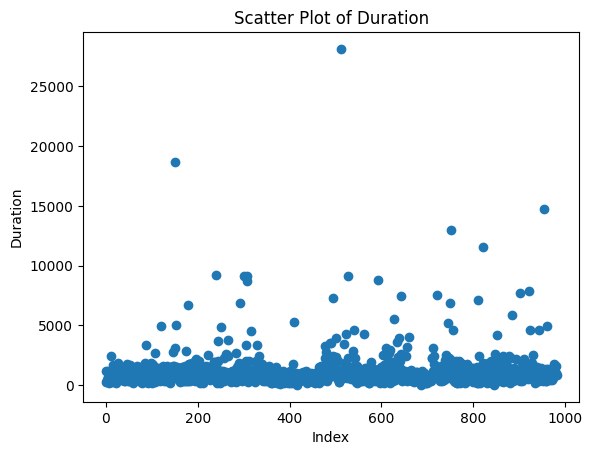

In [38]:
import matplotlib.pyplot as plt

sample_size = 1000 
duration_data = spring_df.select("Duration").sample(False, sample_size/spring_df.count()).toPandas()

plt.scatter(range(len(duration_data)), duration_data)
plt.xlabel("Index")
plt.ylabel("Duration")
plt.title("Scatter Plot of Duration")
plt.show()


In [39]:
# import Python libs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

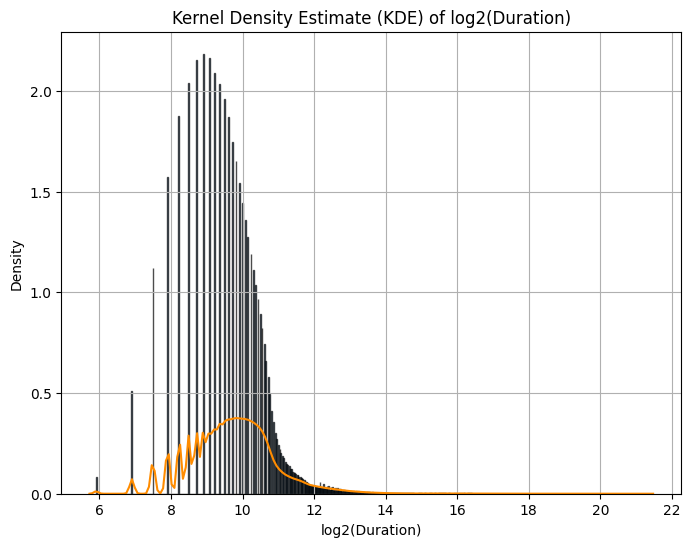

In [40]:
# Assuming your PySpark DataFrame is named 'spring_df'
duration_data = spring_df.filter(col('Duration') > 0).select('Duration').rdd.flatMap(lambda x: x).collect()
duration_data_log2 = np.log2(duration_data)

plt.figure(figsize=(8, 6))
plt.title('Kernel Density Estimate (KDE) of log2(Duration)')
plt.xlabel('log2(Duration)')
plt.ylabel('Density')
plt.grid(True)

# Plot the KDE using a histogram with a Gaussian kernel
plt.hist(duration_data_log2, bins='auto', density=True, color='steelblue', alpha=0.7, edgecolor='black')

# Add a kernel density estimate line
sns.kdeplot(duration_data_log2, color='darkorange')

plt.show()

In [41]:
##here the outliers are clearly visible from the KDE plot, ie the values less than 2^7 and 2^14 -  
# ie the actual spring duration is from <128 minutes to ~  10000  ( I took 2^12 first which felt very less, 2^ 14 is very high and again had outliers, so reduced the upper bound to 10000)

## Remove Outliers

In [42]:
spring_df_f = spring_df.filter("Duration >= 128").filter("Duration <= 10000")[["Duration","start_date"]]
spring_df_f.count()

2626339

/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


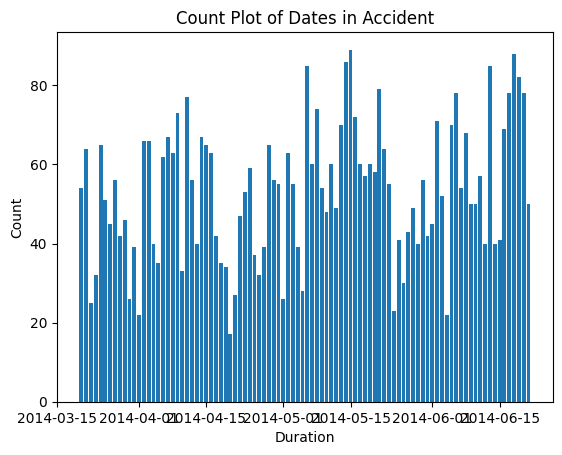

In [43]:
duration_counts = accident_df.groupBy("Date").count().orderBy("Date").toPandas()

plt.bar(duration_counts["Date"], duration_counts["count"])
plt.xlabel("Duration")
plt.ylabel("Count")
plt.title("Count Plot of Dates in Accident")
plt.show()


<Figure size 2000x1000 with 0 Axes>

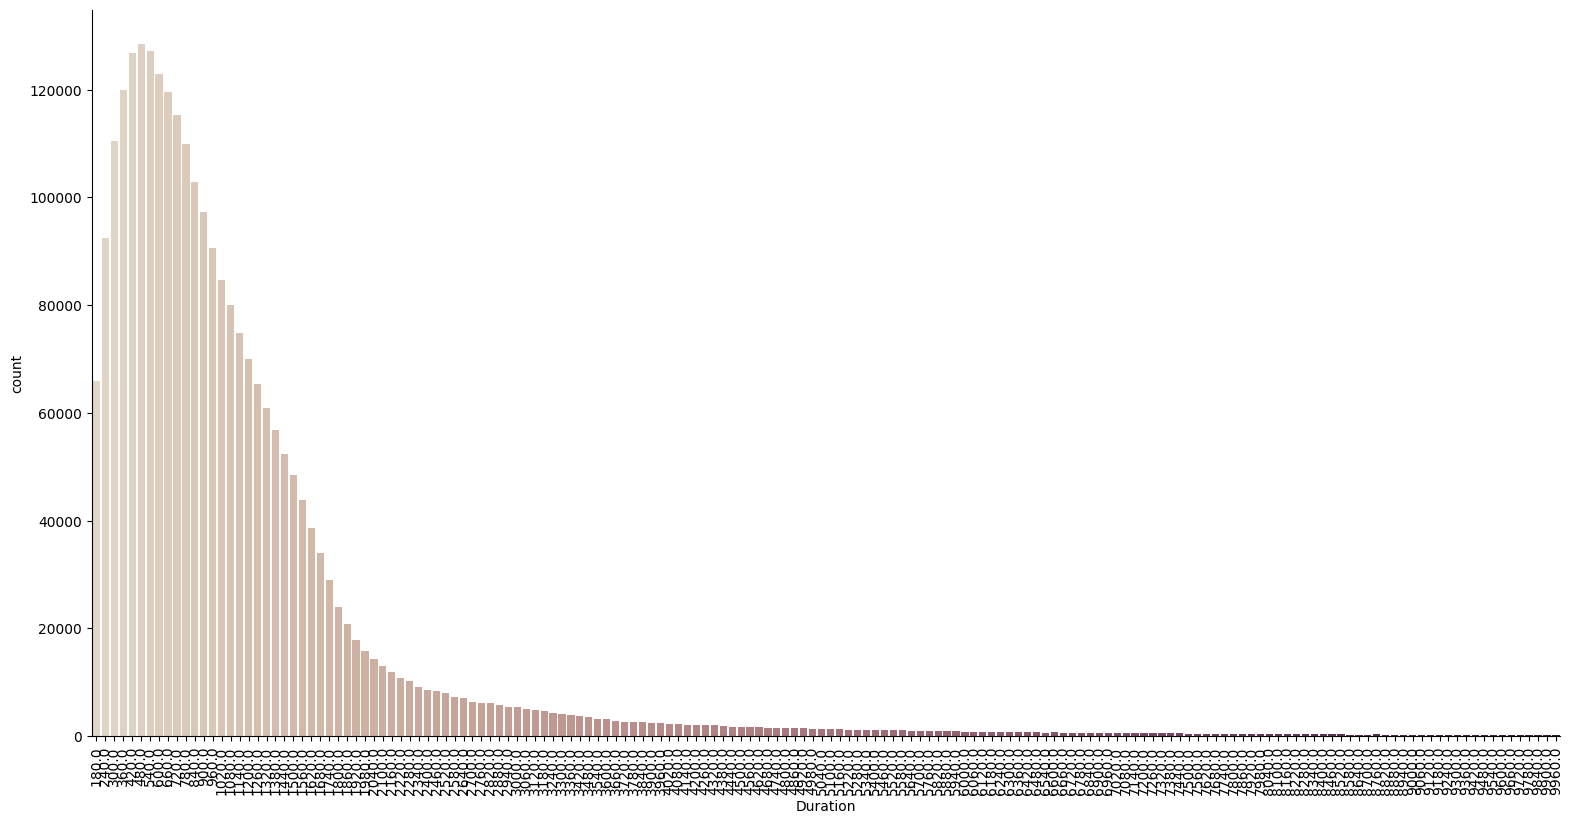

In [44]:
var = "Duration"

# Convert the PySpark DataFrame to a Pandas DataFrame
df_pd = spring_df_f.select(var).toPandas()

plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=df_pd)
plt.xticks(rotation=90)

plt.show()


# **5.** *Data Exploration*

In [45]:
spring_df_f.printSchema()

root
 |-- Duration: float (nullable = true)
 |-- start_date: timestamp (nullable = true)



In [46]:
spring_df_f.show(5)

+--------+-------------------+
|Duration|         start_date|
+--------+-------------------+
|  1140.0|2014-05-27 00:40:00|
|   660.0|2014-05-30 17:49:00|
|  1440.0|2014-06-03 13:05:00|
|   960.0|2014-06-09 18:15:00|
|  1260.0|2014-06-11 19:37:00|
+--------+-------------------+
only showing top 5 rows



In [47]:
from pyspark.sql.functions import sum, to_date

duration_sum_df = spring_df_f.withColumn('start_date', to_date('start_date')).groupBy('start_date').agg(sum('Duration').alias('Total_Duration'))
# Sort the DataFrame by Date in ascending order
sorted_duration_sum_df = duration_sum_df.sort(col('start_date'))

sorted_duration_sum_df.show(10)

+----------+--------------+
|start_date|Total_Duration|
+----------+--------------+
|2014-03-20|     1.99305E7|
|2014-03-21|    2.147028E7|
|2014-03-22|    2.288832E7|
|2014-03-23|    2.168874E7|
|2014-03-24|    2.120838E7|
|2014-03-25|    1.525368E7|
|2014-03-26|    1.620492E7|
|2014-03-27|    1.943424E7|
|2014-03-28|    2.176434E7|
|2014-03-29|    4.316466E7|
+----------+--------------+
only showing top 10 rows



In [48]:
sorted_duration_sum_df.count()

94

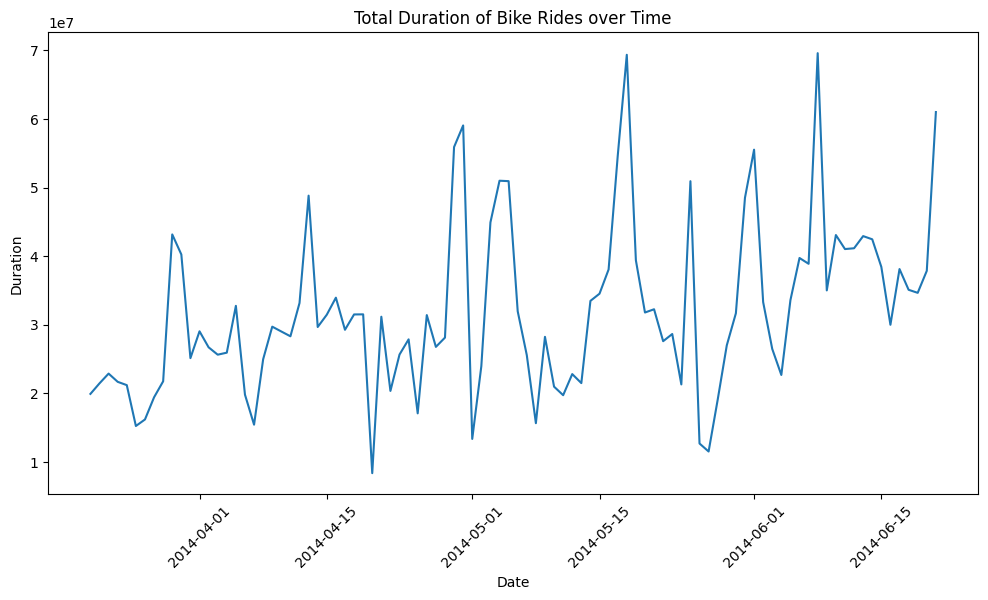

In [49]:
import matplotlib.pyplot as plt

# Sort the DataFrame by start_date in ascending order
sorted_df = duration_sum_df.sort('start_date')

# Convert the sorted DataFrame to Pandas DataFrame
pandas_df = sorted_df.toPandas()

# Plot the duration values on the order of date
plt.figure(figsize=(12, 6))
plt.plot(pandas_df['start_date'], pandas_df['Total_Duration'])
plt.xlabel('Date')
plt.ylabel('Duration')
plt.title('Total Duration of Bike Rides over Time')
plt.xticks(rotation=45)
plt.show()


In [50]:
accident_df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Accident_Index: string (nullable = true)
 |-- Time: timestamp (nullable = true)
 |-- Speed_limit: double (nullable = true)
 |-- Weather_conditions: string (nullable = true)



/content/spark-3.3.2-bin-hadoop3/python/pyspark/sql/pandas/conversion.py:248: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


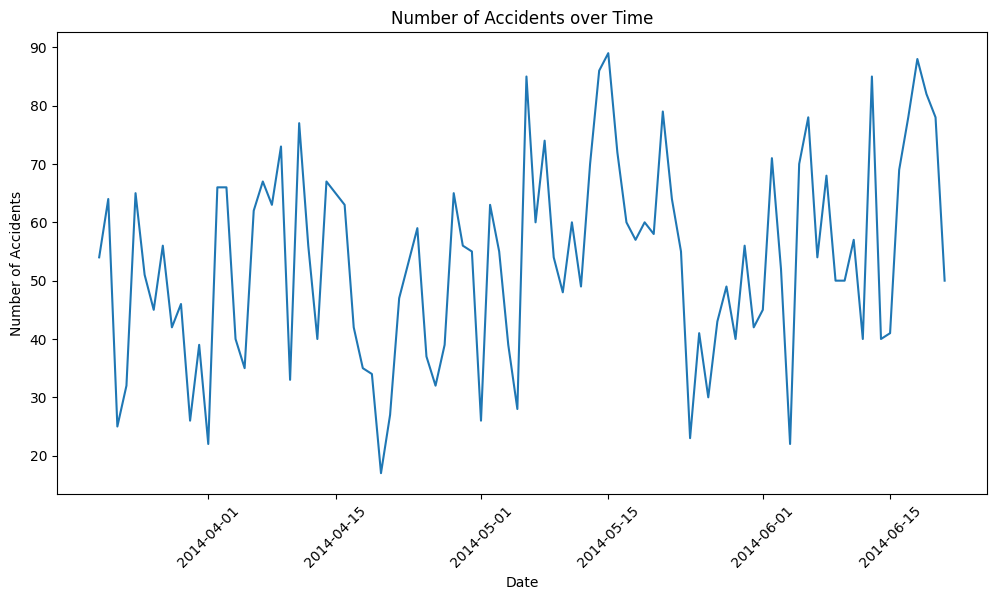

In [51]:
import matplotlib.pyplot as plt

# Group the accidents by Date and count the occurrences
count_df = accident_df.groupBy('Date').count()

# Sort the DataFrame by Date in ascending order
sorted_df = count_df.sort('Date')

# Convert the sorted DataFrame to Pandas DataFrame
pandas_df = sorted_df.toPandas()

# Plot the count of accidents on the order of date
plt.figure(figsize=(12, 6))
plt.plot(pandas_df['Date'], pandas_df['count'])
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents over Time')
plt.xticks(rotation=45)
plt.show()


In [52]:
from pyspark.sql.functions import col, to_date


total_accidents_df = accident_df.withColumn('Date', to_date('Date')).groupBy('Date').count()

# Sort the DataFrame by Date in ascending order
sorted_total_accidents_df = total_accidents_df.sort(col('Date'))

# Show the DataFrame
sorted_total_accidents_df.show()


+----------+-----+
|      Date|count|
+----------+-----+
|2014-03-20|   54|
|2014-03-21|   64|
|2014-03-22|   25|
|2014-03-23|   32|
|2014-03-24|   65|
|2014-03-25|   51|
|2014-03-26|   45|
|2014-03-27|   56|
|2014-03-28|   42|
|2014-03-29|   46|
|2014-03-30|   26|
|2014-03-31|   39|
|2014-04-01|   22|
|2014-04-02|   66|
|2014-04-03|   66|
|2014-04-04|   40|
|2014-04-05|   35|
|2014-04-06|   62|
|2014-04-07|   67|
|2014-04-08|   63|
+----------+-----+
only showing top 20 rows



In [53]:
sorted_total_accidents_df.count()

94

# **6.** *Merge the Data*

In [54]:
from pyspark.sql.functions import col

# Perform merge operation using join method and join condition
merged_df = duration_sum_df.join(sorted_total_accidents_df, col("start_date") == col("Date"), "left")
merged_df.show(10)


+----------+--------------+----------+-----+
|start_date|Total_Duration|      Date|count|
+----------+--------------+----------+-----+
|2014-06-03|    2.647842E7|2014-06-03|   52|
|2014-06-11|    4.103124E7|2014-06-11|   57|
|2014-06-13|    4.291878E7|2014-06-13|   85|
|2014-06-19|    3.465414E7|2014-06-19|   82|
|2014-06-21|    6.099234E7|2014-06-21|   50|
|2014-06-09|    3.500958E7|2014-06-09|   50|
|2014-06-15|    3.842736E7|2014-06-15|   41|
|2014-06-05|    3.358848E7|2014-06-05|   70|
|2014-06-14|    4.245336E7|2014-06-14|   40|
|2014-05-28|    1.909218E7|2014-05-28|   49|
+----------+--------------+----------+-----+
only showing top 10 rows



In [55]:
duration_sum_df.count()

94

In [56]:
sorted_total_accidents_df.count()

94

In [57]:
merged_df.count()

94

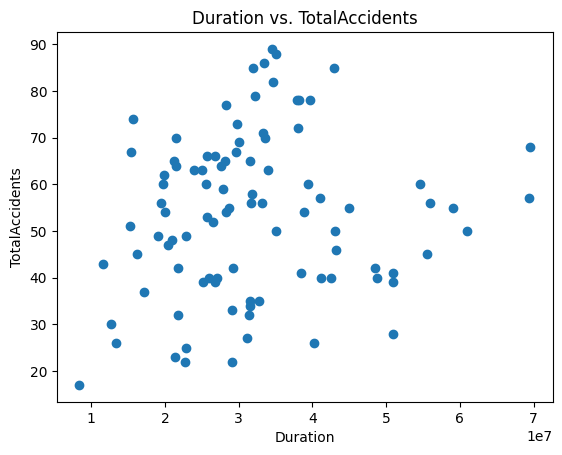

In [59]:
import matplotlib.pyplot as plt

# Extract the Duration and TotalAccidents columns as lists
duration = merged_df.select('Total_Duration').rdd.flatMap(lambda x: x).collect()
total_accidents = merged_df.select('count').rdd.flatMap(lambda x: x).collect()

# Create a scatter plot
plt.scatter(duration, total_accidents)
plt.xlabel('Duration')
plt.ylabel('TotalAccidents')
plt.title('Duration vs. TotalAccidents')
plt.show()


In [62]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

# Prepare the data for linear regression
assembler = VectorAssembler(inputCols=['Total_Duration'], outputCol='features')
data = assembler.transform(merged_df).select('features', 'count')

# Create and fit the linear regression model
lr = LinearRegression(featuresCol='features', labelCol='count')
model = lr.fit(data)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coefficients)
print("Intercept:", model.intercept)

Coefficients: [1.798349668057781e-07]
Intercept: 47.67425648412969


In [63]:
#The coefficient value of 1.798349668057781e-07 suggests that there is a very small positive relationship between duration and the number of accidents. However, since the coefficient is close to zero, the relationship is weak.
#The intercept value of 47.67425648412969 indicates the expected number of accidents when the duration is zero. However, since the intercept is relatively high, it suggests that there may be other factors influencing the number of accidents, apart from just the duration.

In [65]:
from pyspark.sql.functions import corr

correlation = merged_df.select(corr('Total_Duration', 'count')).collect()[0][0]
print("Correlation between Duration and count:", correlation)


Correlation between Duration and count: 0.12987460309489718


In [66]:
#A correlation coefficient of 0.12987460309489718 indicates a weak positive correlation between duration and the total number of accidents.

In [68]:
duration_stats = merged_df.select('Total_Duration').describe().toPandas()
accidents_stats = merged_df.select('count').describe().toPandas()

print("Duration Summary Statistics:")
print(duration_stats)

print("TotalAccidents Summary Statistics:")
print(accidents_stats)

Duration Summary Statistics:
  summary        Total_Duration
0   count                    94
1    mean   3.192169595744681E7
2  stddev  1.2428331115336938E7
3     min             8382480.0
4     max            6.957066E7
TotalAccidents Summary Statistics:
  summary               count
0   count                  94
1    mean   53.41489361702128
2  stddev  17.209280800994726
3     min                  17
4     max                  89


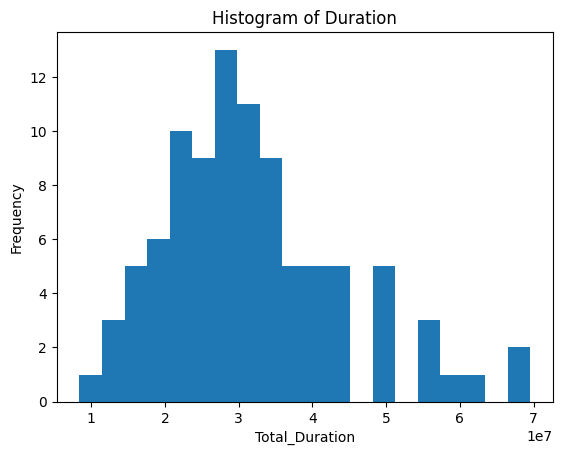

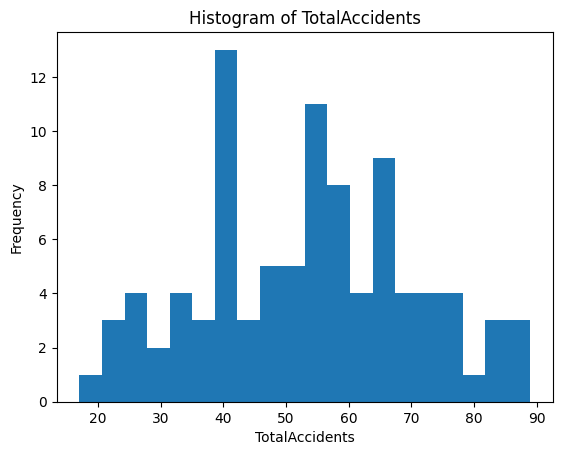

In [69]:
plt.hist(merged_df.select('Total_Duration').rdd.flatMap(lambda x: x).collect(), bins=20)
plt.xlabel('Total_Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

plt.hist(merged_df.select('count').rdd.flatMap(lambda x: x).collect(), bins=20)
plt.xlabel('TotalAccidents')
plt.ylabel('Frequency')
plt.title('Histogram of TotalAccidents')
plt.show()


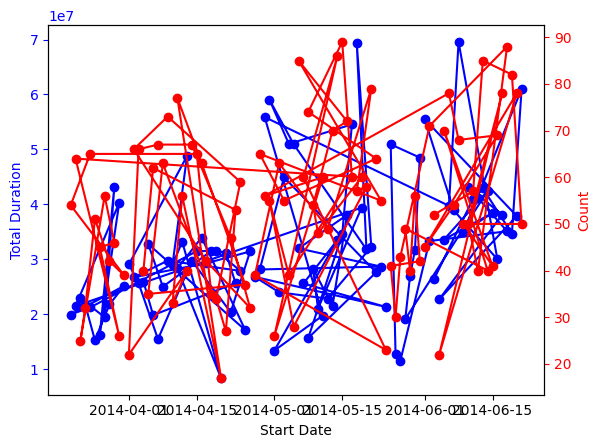

In [70]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = merged_df.toPandas()

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot Total_Duration on the first axis
ax1.plot(pandas_df['start_date'], pandas_df['Total_Duration'], color='blue', marker='o')
ax1.set_xlabel('Start Date')
ax1.set_ylabel('Total Duration', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for count
ax2 = ax1.twinx()
ax2.plot(pandas_df['start_date'], pandas_df['count'], color='red', marker='o')
ax2.set_ylabel('Count', color='red')
ax2.tick_params('y', colors='red')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


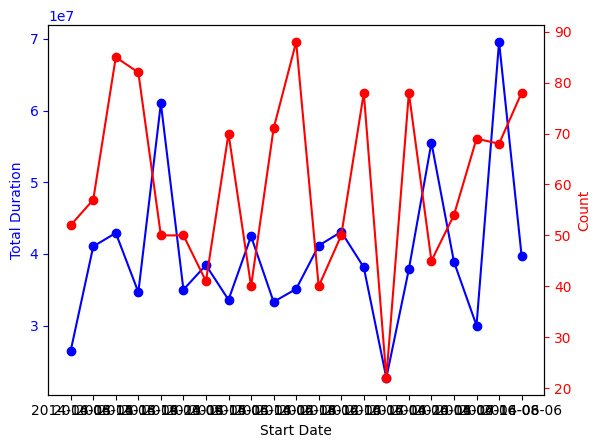

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = merged_df.toPandas()

# Convert start_date to string type
pandas_df['start_date'] = pandas_df['start_date'].astype(str)

# Filter data for a specific month (e.g., June 2014)
desired_month = '2014-06'
filtered_df = pandas_df[pandas_df['start_date'].str.startswith(desired_month)]

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot Total_Duration on the first axis
ax1.plot(filtered_df['start_date'], filtered_df['Total_Duration'], color='blue', marker='o')
ax1.set_xlabel('Start Date')
ax1.set_ylabel('Total Duration', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for count
ax2 = ax1.twinx()
ax2.plot(filtered_df['start_date'], filtered_df['count'], color='red', marker='o')
ax2.set_ylabel('Count', color='red')
ax2.tick_params('y', colors='red')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [72]:
from pyspark.sql import functions as F

# Order the DataFrame by count in descending order
ordered_df = merged_df.orderBy(F.desc("count"))

# Display the ordered DataFrame
ordered_df.show()


+----------+--------------+----------+-----+
|start_date|Total_Duration|      Date|count|
+----------+--------------+----------+-----+
|2014-05-15|     3.45297E7|2014-05-15|   89|
|2014-06-18|    3.509736E7|2014-06-18|   88|
|2014-05-14|    3.348282E7|2014-05-14|   86|
|2014-06-13|    4.291878E7|2014-06-13|   85|
|2014-05-06|     3.19701E7|2014-05-06|   85|
|2014-06-19|    3.465414E7|2014-06-19|   82|
|2014-05-21|     3.22611E7|2014-05-21|   79|
|2014-06-20|    3.786114E7|2014-06-20|   78|
|2014-06-06|    3.973056E7|2014-06-06|   78|
|2014-06-17|    3.811902E7|2014-06-17|   78|
|2014-04-11|     2.83221E7|2014-04-11|   77|
|2014-05-08|    1.566168E7|2014-05-08|   74|
|2014-04-09|    2.972568E7|2014-04-09|   73|
|2014-05-16|     3.80586E7|2014-05-16|   72|
|2014-06-02|    3.330594E7|2014-06-02|   71|
|2014-06-05|    3.358848E7|2014-06-05|   70|
|2014-05-13|    2.150352E7|2014-05-13|   70|
|2014-06-16|     3.00021E7|2014-06-16|   69|
|2014-06-08|    6.957066E7|2014-06-08|   68|
|2014-04-0

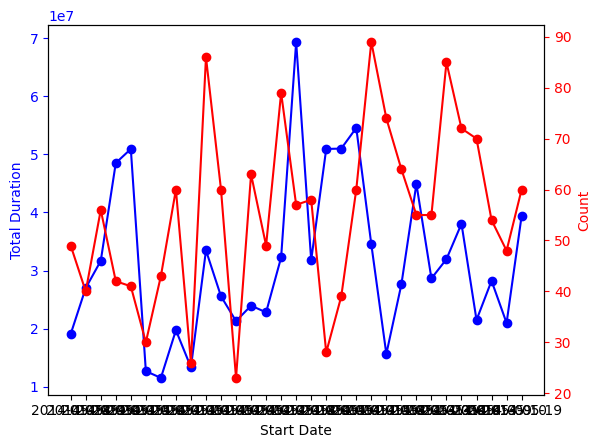

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = merged_df.toPandas()

# Convert start_date to string type
pandas_df['start_date'] = pandas_df['start_date'].astype(str)

# Filter data for a specific month (e.g., June 2014)
desired_month = '2014-05'
filtered_df = pandas_df[pandas_df['start_date'].str.startswith(desired_month)]

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot Total_Duration on the first axis
ax1.plot(filtered_df['start_date'], filtered_df['Total_Duration'], color='blue', marker='o')
ax1.set_xlabel('Start Date')
ax1.set_ylabel('Total Duration', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for count
ax2 = ax1.twinx()
ax2.plot(filtered_df['start_date'], filtered_df['count'], color='red', marker='o')
ax2.set_ylabel('Count', color='red')
ax2.tick_params('y', colors='red')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [74]:
# Order the DataFrame by count in descending order
ordered_df = merged_df.orderBy(F.asc("count"))

# Display the ordered DataFrame
ordered_df.show()


+----------+--------------+----------+-----+
|start_date|Total_Duration|      Date|count|
+----------+--------------+----------+-----+
|2014-04-20|     8382480.0|2014-04-20|   17|
|2014-04-01|    2.904954E7|2014-04-01|   22|
|2014-06-04|      2.2689E7|2014-06-04|   22|
|2014-05-24|      2.1312E7|2014-05-24|   23|
|2014-03-22|    2.288832E7|2014-03-22|   25|
|2014-03-30|    4.024296E7|2014-03-30|   26|
|2014-05-01|    1.337136E7|2014-05-01|   26|
|2014-04-21|    3.117306E7|2014-04-21|   27|
|2014-05-05|    5.092506E7|2014-05-05|   28|
|2014-05-26|    1.270524E7|2014-05-26|   30|
|2014-04-26|    3.141366E7|2014-04-26|   32|
|2014-03-23|    2.168874E7|2014-03-23|   32|
|2014-04-10|    2.902074E7|2014-04-10|   33|
|2014-04-19|    3.151896E7|2014-04-19|   34|
|2014-04-18|     3.15057E7|2014-04-18|   35|
|2014-04-05|    3.275838E7|2014-04-05|   35|
|2014-04-25|    1.709682E7|2014-04-25|   37|
|2014-05-04|     5.09865E7|2014-05-04|   39|
|2014-04-27|     2.67807E7|2014-04-27|   39|
|2014-03-3

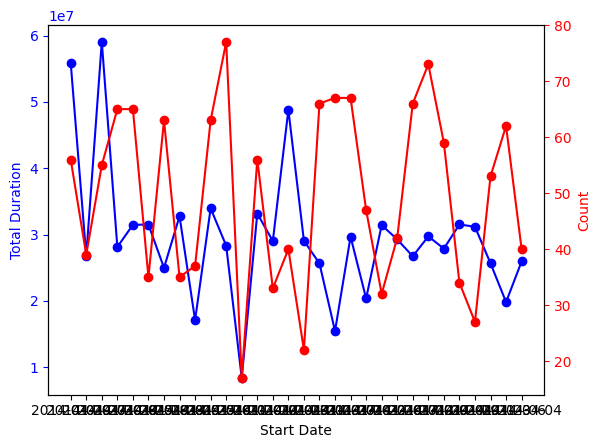

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = merged_df.toPandas()

# Convert start_date to string type
pandas_df['start_date'] = pandas_df['start_date'].astype(str)

# Filter data for a specific month (e.g., June 2014)
desired_month = '2014-04'
filtered_df = pandas_df[pandas_df['start_date'].str.startswith(desired_month)]

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot Total_Duration on the first axis
ax1.plot(filtered_df['start_date'], filtered_df['Total_Duration'], color='blue', marker='o')
ax1.set_xlabel('Start Date')
ax1.set_ylabel('Total Duration', color='blue')
ax1.tick_params('y', colors='blue')

# Create a second y-axis for count
ax2 = ax1.twinx()
ax2.plot(filtered_df['start_date'], filtered_df['count'], color='red', marker='o')
ax2.set_ylabel('Count', color='red')
ax2.tick_params('y', colors='red')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


7. Hypothetical Testing

In [76]:
from pyspark.sql import functions as F

# Calculate the mean duration
mean_duration = merged_df.agg(F.mean('Total_Duration')).collect()[0][0]

# Separate the DataFrame into low duration and high duration DataFrames
low_duration_df = merged_df.filter(merged_df['Total_Duration'] <= mean_duration)
high_duration_df = merged_df.filter(merged_df['Total_Duration'] > mean_duration)

# Show the low duration DataFrame
print("Low Duration DataFrame:")
low_duration_df.show()

# Show the high duration DataFrame
print("High Duration DataFrame:")
high_duration_df.show()


Low Duration DataFrame:
+----------+--------------+----------+-----+
|start_date|Total_Duration|      Date|count|
+----------+--------------+----------+-----+
|2014-06-03|    2.647842E7|2014-06-03|   52|
|2014-05-28|    1.909218E7|2014-05-28|   49|
|2014-05-29|     2.70078E7|2014-05-29|   40|
|2014-05-30|    3.167712E7|2014-05-30|   56|
|2014-05-26|    1.270524E7|2014-05-26|   30|
|2014-05-27|    1.153824E7|2014-05-27|   43|
|2014-06-04|      2.2689E7|2014-06-04|   22|
|2014-06-16|     3.00021E7|2014-06-16|   69|
|2014-05-11|    1.974216E7|2014-05-11|   60|
|2014-05-01|    1.337136E7|2014-05-01|   26|
|2014-05-07|    2.558022E7|2014-05-07|   60|
|2014-05-24|      2.1312E7|2014-05-24|   23|
|2014-04-27|     2.67807E7|2014-04-27|   39|
|2014-05-02|    2.397474E7|2014-05-02|   63|
|2014-05-12|     2.28162E7|2014-05-12|   49|
|2014-05-20|    3.178716E7|2014-05-20|   58|
|2014-05-08|    1.566168E7|2014-05-08|   74|
|2014-05-22|    2.761002E7|2014-05-22|   64|
|2014-04-28|     2.81304E7|2014

In [77]:
import scipy.stats as stats

# Extract the duration values for low duration and high duration DataFrames
low_duration_values = low_duration_df.select('Total_Duration').rdd.flatMap(lambda x: x).collect()
high_duration_values = high_duration_df.select('Total_Duration').rdd.flatMap(lambda x: x).collect()

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(high_duration_values, low_duration_values)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


T-Statistic: 11.735078263256257
P-Value: 5.581133475012066e-20


In [78]:
#Based on the results of the t-test, the calculated t-statistic is 11.735 and the p-value is approximately 5.58e-20 (very close to zero).

#With such a small p-value (below the typical significance level of 0.05), we have strong evidence to reject the null hypothesis (H₀) that there is no significant association between the duration of bike rides and the occurrence of accidents during the spring season.

#Therefore, we can infer that there is a significant association between high duration bike rides and a higher likelihood of accidents during the spring season. This suggests that longer bike rides during the spring season may be associated with an increased risk of accidents.#

# **7.** *Conclusion*

The correlation coefficient between the duration of bike rides and the total number of accidents is 0.1299. This indicates a positive but weak correlation between the two variables.

The linear regression coefficients are as follows: the coefficient for the duration variable is approximately 1.798e-07, and the intercept is approximately 47.6743.

Considering the t-test result, which showed a significant association between high duration bike rides and a higher likelihood of accidents, along with the positive correlation coefficient and the positive coefficient for the duration variable in the linear regression, we can conclude the following:

1.   There is a statistically significant association between high duration bike rides and a higher likelihood of accidents during the spring season.

2.   The positive correlation coefficient indicates a weak positive linear relationship between the duration of bike rides and the total number of accidents.

3.   The positive coefficient for the duration variable in the linear regression suggests that an increase in the duration of bike rides is associated with a slight increase in the total number of accidents.

Overall, these findings support the hypothesis that bike rides with higher durations are more likely to be associated with accidents during the spring season. 